# Problem Statement:

**What is the problem?
The aim is to analyze the Flipkart sales dataset to understand customer preferences, product performance, and sales trends. The analysis will focus on identifying the most popular categories, brands, pricing strategies, and customer ratings.
Why is it important to solve it?
Solving this problem will help Flipkart make data-driven decisions to improve product listings, pricing strategies, and customer satisfaction. The insights gained from this analysis could lead to increased sales, better customer retention, and improved overall business performance.**

In [141]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [94]:
#uploading the data
data=pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [95]:
#checking the shape
data.shape

(20000, 15)

In [96]:
#checking for the null values
data.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [97]:
#checking for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [98]:
data.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [99]:
#checking for duplicates
data.duplicated().sum()

0

In [100]:
#filling null values of column retail_price and discounted price using mean method
data['retail_price']=data['retail_price'].fillna(data['retail_price'].mean())
data['discounted_price']=data['discounted_price'].fillna(data['discounted_price'].mean())

In [101]:
#Since the data loss is very less, less than 1% so sropping the null values form columns image, description and product specification
data.dropna(subset=['image', 'description', 'product_specifications'], inplace=True)

In [102]:
#since the name of the brand is the first word of product name, so filling the null values opf brand name with it
data['brand']=data['brand'].fillna(data['product_name'].str.split( ).str[0])

In [103]:
#checking for null values
data.isna().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

# Category Analysis

In [104]:
#checking for unique values
data['product_category_tree'].unique()

array(['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]',
       '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]',
       '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers"]'],
      dtype=object)

In [105]:
#making a new column main category by splitting the column product category tree
data['main_category']=data['product_category_tree'].str.split('>').str[0]

In [106]:
#top 5 categories
data['main_category'].value_counts()[:5]

["Clothing                  6192
["Jewellery                 3530
["Footwear                  1225
["Mobiles & Accessories     1098
["Automotive                1012
Name: main_category, dtype: int64

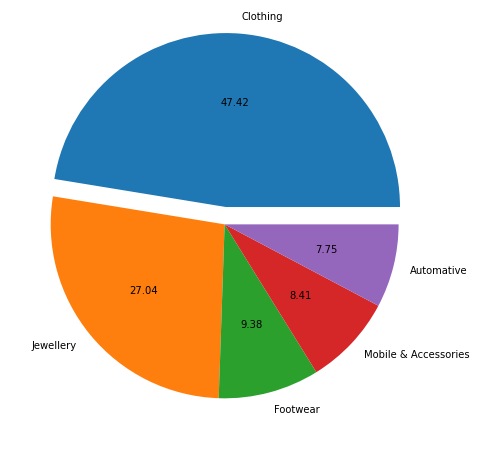

In [107]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Clothing','Jewellery','Footwear','Mobile & Accessories','Automative'
plt.pie(x=data['main_category'].value_counts()[:5],labels=labels,explode=[0.1,0,0,0,0],autopct='%.2f')
plt.show()

# Brand Popularity

In [108]:
#top 5 brand
data['brand'].value_counts()[:5]

Allure Auto     469
Regular         313
Voylla          299
Slim            288
TheLostPuppy    229
Name: brand, dtype: int64

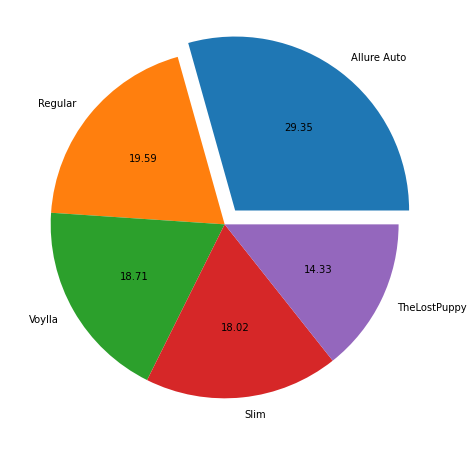

In [109]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Allure Auto','Regular','Voylla','Slim','TheLostPuppy'
plt.pie(x=data['brand'].value_counts()[:5],labels=labels,explode=[0.1,0,0,0,0],autopct='%.2f')
plt.show()

# Pricing Strategy

In [110]:
#making a new column discount percentage
data['discount_percentage']=((data['retail_price']-data['discounted_price'])/data['retail_price'])*100

In [111]:
#After decimal point only two integers should be displayed
data['discount_percentage']=data['discount_percentage'].round(2)

In [112]:
#Average of Discounted Percentage
data['discount_percentage'].mean()

40.498233822132605

# Product Ratings

In [113]:
#Checking value counts
data['product_rating'].value_counts()

No rating available    18132
5                        620
4                        246
1                        171
3                        168
2                         80
4.5                       67
3.7                       51
4.2                       47
3.5                       45
4.3                       45
3.6                       25
4.1                       24
4.7                       24
2.5                       23
3.8                       23
4.8                       21
3.2                       20
3.3                       17
4.4                       16
3.9                       15
3.4                       13
2.3                       12
2.8                       11
2.7                       10
4.6                        9
2.2                        8
3.1                        7
2.4                        5
2.9                        5
1.5                        4
4.9                        4
1.3                        4
1.7                        4
2.6           

In [114]:
#Checking shape
data.shape

(19981, 17)

In [115]:
#Finding the number of products with rating
count=data.shape[0]-18132
count

1849

# OR

In [116]:
#Finding the number of products with rating
rated_products=data[data['product_rating']!='No rating available']

In [117]:
#Count
count_of_rated_product=rated_products['product_rating'].count()
count_of_rated_product

1849

# Flipkart Advantage Analysis

In [118]:
#Mean of true value
percentage_true_values = (data['is_FK_Advantage_product'].mean()) * 100
percentage_true_values

3.928732295680897

# Most Expensive Products

In [119]:
#Finding most expensive products and its price
largest=data.sort_values(by='retail_price',ascending=False)[:3]

In [120]:
#Top 3 expensive products
print(largest[['product_name', 'retail_price']])

                                            product_name  retail_price
116    Breitling AB011010/BB08 131S Chronomat 44 Anal...      571230.0
11631                       Durian Leather 2 Seater Sofa      250500.0
11507                Durian Laze/3 Leather 3 Seater Sofa      217500.0


# Brand-wise Ratings

In [121]:
#replacing the no rating available to 0
data['temp_product_rating']=data['product_rating'].replace('No rating available',0)

In [122]:
#Changing data type to float
data['temp_product_rating']=data['temp_product_rating'].astype(float)

In [123]:
#Changing data type to int
data['temp_product_rating']=data['temp_product_rating'].astype(int)

In [124]:
#Brand average rating
brand_avg_rating = data.groupby('brand')['temp_product_rating'].mean()

In [130]:
#Highest brand average rating
brand_wise_rating= brand_avg_rating.sort_values(ascending=False)
brand_wise_rating[:5]

brand
INDIANO          5.0
LADY             5.0
Ortho            5.0
SR Crafts        5.0
BigshopOnline    5.0
Name: temp_product_rating, dtype: float64

# Category-wise Pricing

In [131]:
#category wise average pricing
category_wise_rating=data.groupby('main_category')['retail_price'].mean()
category_wise_rating

main_category
["883 Police Full Sleeve Solid Men's Jacket"]              7499.0
["ABEEZ Boys, Men, Girls (Black, Pack of 1)"]               399.0
["ANAND ARCHIES Girls Flats"]                               499.0
["ANAND ARCHIES Girls Wedges"]                              899.0
["ANASAZI Casual 3/4 Sleeve Solid Women's Top"]             899.0
                                                            ...  
["run of luck Solid Women's Round Neck Dark Blue T..."]     299.0
["soie Fashion Women's Full Coverage Bra"]                  540.0
["soie Fashion Women's Sports Bra"]                         880.0
["tadd Men's, Women's Ankle Length Socks"]                  499.0
["xy decor Cotton Sofa Cover (white Pack of 6)"]           1699.0
Name: retail_price, Length: 266, dtype: float64

In [132]:
#Higehst average rating
highest_category_wise_rating=category_wise_rating.sort_values(ascending=False)
highest_category_wise_rating

main_category
["Furniture                                          23262.966667
["Automation & Robotics                              19999.000000
["Rasav Jewels Yellow Gold Diamond 18 K Ring"]       13903.000000
["Asics Gel-Kayano 22 Running Shoes"]                12499.000000
["Behringer Xenyx 502 Analog Sound Mixer"]           10000.000000
                                                         ...     
["Kraft Seeds Thyme Herbs Seed (200 per packet)"]      280.000000
["JUSF2 Black Color Hair Band (Multicolor)"]           249.000000
["Naaz 2 in 1 Paper Quilling Board Game"]              230.000000
["Siemens 5SL Betagard 5SL MCB (1)"]                   197.000000
["SUPERMOD Men's Brief"]                               139.000000
Name: retail_price, Length: 266, dtype: float64

# Product Descriptions

In [133]:
#making new column len description to find the highest and lowest lenth of description
data['len_description']=data['description'].apply(len)

In [134]:
#index of longest description
index_longest_description = data['len_description'].idxmax()
index_longest_description

439

In [135]:
#index of shortest description
index_shortest_description = data['len_description'].idxmin()
index_shortest_description

10952

In [136]:
#Product name of longest description
product_name_long=data.loc[index_longest_description, 'product_name']
product_name_long

"Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterling Silver, Metal, Alloy Cat's Eye NA K Ring"

In [137]:
#Product name of shortest description
product_name_short=data.loc[index_shortest_description, 'product_name']
product_name_short

"Klick Women's Leggings"

# Time Analysis

In [138]:
#converting it to date time format
data['crawl_timestamp']=pd.to_datetime(data['crawl_timestamp'])

In [139]:
#making a new column month
data['month'] = data['crawl_timestamp'].dt.month

In [140]:
#month in which data mostly crawled
data_mostly_crawled=data['month'].value_counts()[:1]
data_mostly_crawled

12    10314
Name: month, dtype: int64